# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print (lats)
print (lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        print (city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

[  6.70471658  46.1750275  -53.66887691 ...  -8.56063896 -38.16881925
 -71.50426672]
[-120.90235871  -15.97813914   21.40703065 ... -128.80989304   34.15370119
  -11.33475877]
cabo san lucas
mugia
bredasdorp
iqaluit
port moresby
constantia
niafunke
bilibino
west island
albany
okhotsk
tazovsky
aromashevo
port-aux-francais
puerto leguizamo
hilo
klyuchi
dudinka
nar'yan-mar
margaret river
mili
dolyns'ka
afaahiti
ushuaia
labrador city
el calafate
adamstown
saipan
zelenodolsk
port alfred
edinburgh of the seven seas
qal'at bishah
atafu village
argo
wawa
hami
tsiombe
ust-nera
nova odesa
muynoq
lobujya
ashland
anadyr
st. john's
aasiaat
waitangi
grytviken
muzayri'
obo
el granada
hermanus
egilsstadir
xapuri
badger
stanley
buckie
poyarkovo
arkalyk
glace bay
revda
kavieng
qaqortoq
puerto ayora
taiohae
vorgashor
saint-philippe
flying fish cove
taoudenni
phan rang-thap cham
westport
valky
polyarnyy
hawaiian paradise park
mateur
basciftlik
ekibastuz
igarka
lincheng
guaruja
blackmans bay
papatowai
la'i

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    print (city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        print (city_weather_response)
        city_weather = city_weather_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=cabo san lucas&units=metric
Processing Record 1 of Set 1 | cabo san lucas
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=mugia&units=metric
Processing Record 2 of Set 1 | mugia
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=bredasdorp&units=metric
Processing Record 3 of Set 1 | bredasdorp
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=iqaluit&units=metric
Processing Record 4 of Set 1 | iqaluit
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=port moresby&units=metric
Processing Record 5 of Set 1 | port moresby
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=c

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,16.80,79,39,6.39,MX,1714202775
1,mugia,43.1041,-9.2179,10.91,78,100,8.53,ES,1714202775
2,bredasdorp,-34.5322,20.0403,17.28,78,5,7.35,ZA,1714202656
3,iqaluit,63.7506,-68.5145,-12.86,74,100,4.97,CA,1714202776
4,port moresby,-9.4431,147.1797,27.55,86,100,6.88,PG,1714202777


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,16.80,79,39,6.39,MX,1714202775
1,mugia,43.1041,-9.2179,10.91,78,100,8.53,ES,1714202775
2,bredasdorp,-34.5322,20.0403,17.28,78,5,7.35,ZA,1714202656
3,iqaluit,63.7506,-68.5145,-12.86,74,100,4.97,CA,1714202776
4,port moresby,-9.4431,147.1797,27.55,86,100,6.88,PG,1714202777


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

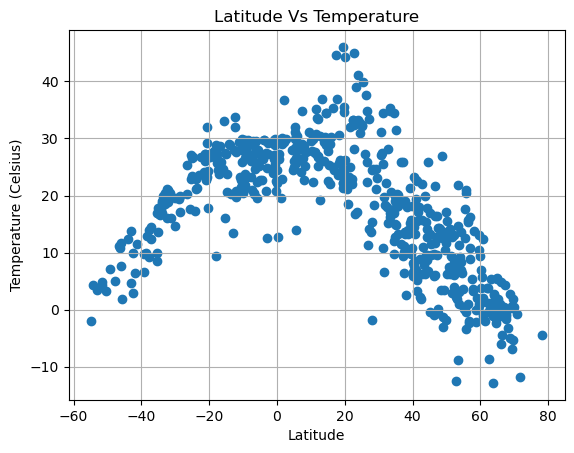

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

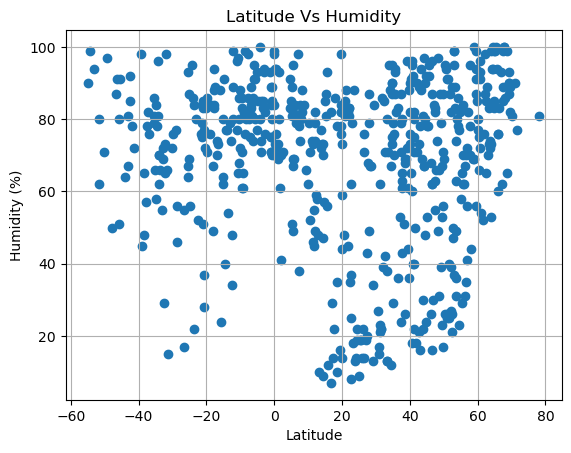

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

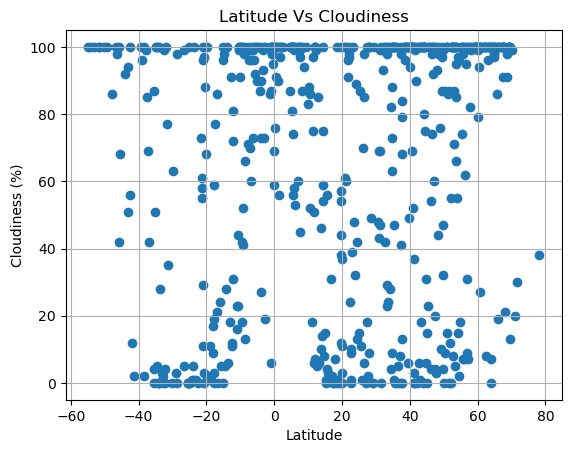

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

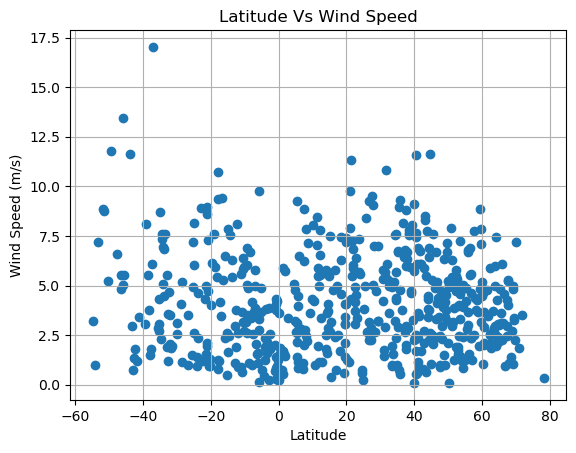

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_regress_plots(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# # Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,16.80,79,39,6.39,MX,1714202775
1,mugia,43.1041,-9.2179,10.91,78,100,8.53,ES,1714202775
3,iqaluit,63.7506,-68.5145,-12.86,74,100,4.97,CA,1714202776
5,constantia,44.1833,28.6500,14.09,67,80,4.49,RO,1714202777
6,niafunke,15.9322,-3.9906,30.23,12,3,4.78,ML,1714202778


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,17.28,78,5,7.35,ZA,1714202656
4,port moresby,-9.4431,147.1797,27.55,86,100,6.88,PG,1714202777
8,west island,-12.1568,96.8225,27.65,80,31,8.10,CC,1714202779
13,port-aux-francais,-49.3500,70.2167,7.16,97,100,11.76,TF,1714202782
14,puerto leguizamo,-0.1934,-74.7819,22.54,98,69,0.76,CO,1714202782


###  Temperature vs. Latitude Linear Regression Plot

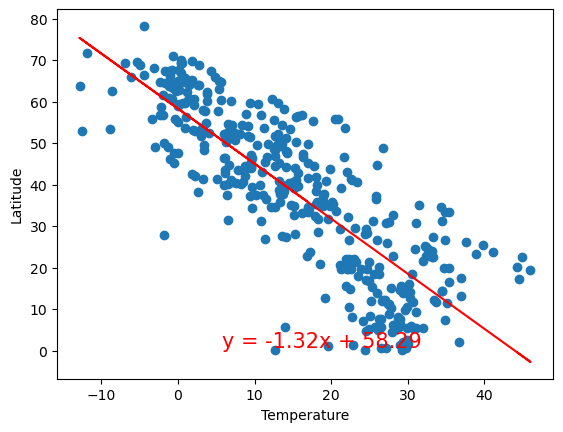

In [55]:
# Linear regression on Northern Hemisphere
linear_regress_plots(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], "Temperature", "Latitude")


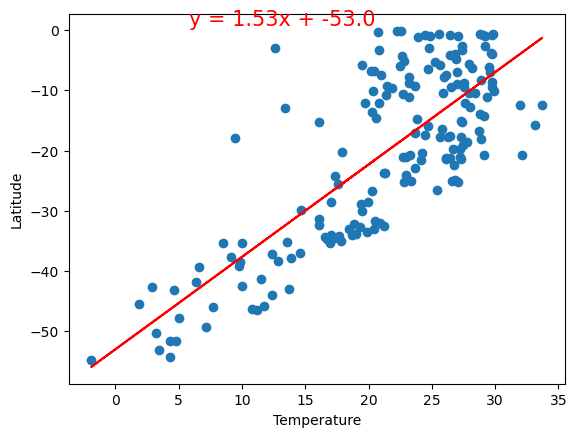

In [57]:
# Linear regression on Southern Hemisphere
linear_regress_plots(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"], "Temperature", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

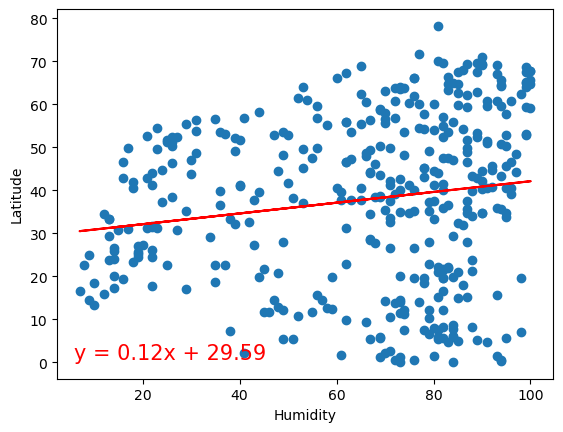

In [58]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Humidity"], northern_hemi_df["Lat"], "Humidity", "Latitude")

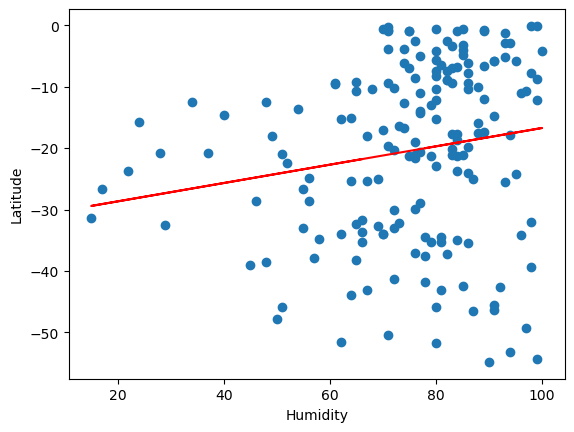

In [59]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Humidity"], southern_hemi_df["Lat"], "Humidity", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

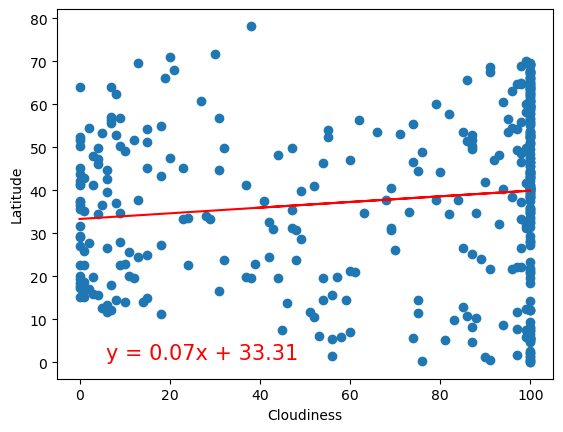

In [60]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"], "Cloudiness", "Latitude")

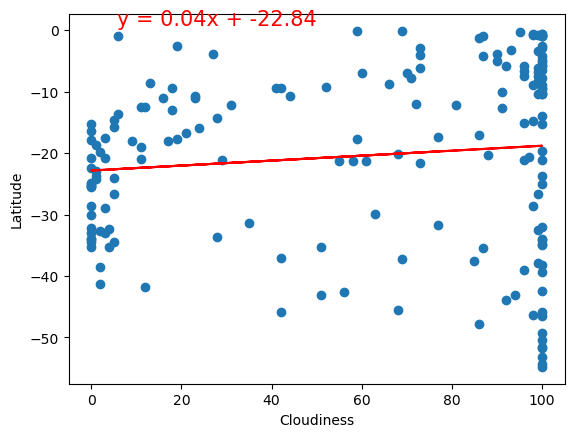

In [61]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"], "Cloudiness", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

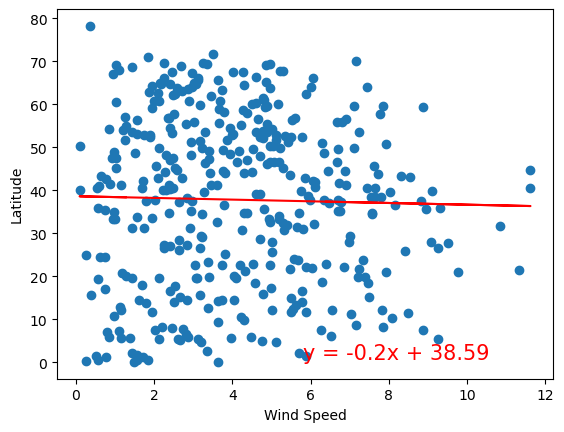

In [62]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"], "Wind Speed", "Latitude")

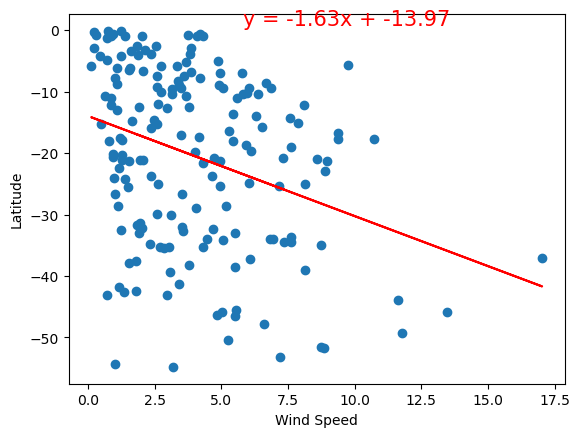

In [63]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"], "Wind Speed", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE